#### Exploring the Titanic Data Set

The goal of this Udacity project is to explore the Titanic data set and understand what factors made people more likely to survive.

I stared out my investigation by importing the python libraries and the Titanic data set.

I ran .info, .describe and .head functions to get a look at the data.
 

In [52]:
%matplotlib inline
import unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as P
        
filename = '/Users/douglasjoseph-iMac/Documents/UdacityNDIP/Titanic Data Set/titanic_data.csv'
titanic_df = pd.read_csv(filename)
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


When I ran describe function, I noticed that the Age was not populated on all rows.  The Age attribute was in 714 out of 891 passenger rows.

In [53]:
print titanic_df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [54]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let’s take a look a histogram of the passengers by Age.
The describe function shows the passenger's mean Age is 29.7.
Below is a histogram of the passenger's ages.

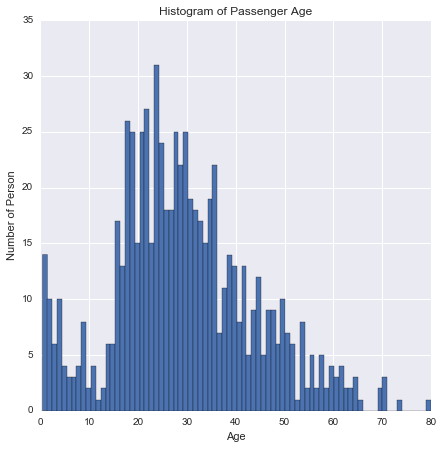

In [55]:
titanic_df.Age.hist(bins=80,figsize = (7,7))
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

Kaggle web site also provided a tutorial of how to review and clean up the data with Python.
So, I will also take advantage of its tutorial and follow some of its steps.
Link to the [kaggle](https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii) tutorial.

The Kaggle website suggested to fill in the rows with missing age values.
Other websites suggested to remove rows with missing age values.
For the purpose of learning to code, I wanted to filling in the missing values using the 
approach on the Kaggle website (but for full disclosure, I have not taken enough statistics or data wrangling classes to know when its best to drop the rows with missing data, or when to 'make up' new values).
 
Anyhow, for rows with Age containing 'NaN' (not a number), Kaggle code calculates the median age value for each class by sex of passenger.  Kaggle also adds a new column called AgeFill will contain the new calculated age.

In [56]:
titanic_df['Gender'] = 4
titanic_df['Gender'] = titanic_df['Sex'].map( lambda x: x[0].upper() )
titanic_df['Gender'] = titanic_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [57]:
#https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii
#create an array for males and females in each passenger class
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [58]:
# code to calculate the median age for each gender by passenger class
#https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = titanic_df[(titanic_df['Gender'] == i) & \
                              (titanic_df['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [59]:
titanic_df['AgeFill'] = titanic_df['Age']

In [60]:
#code to populate dataframe with median age value
#https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii
for i in range(0, 2):
    for j in range(0, 3):
        titanic_df.loc[ (titanic_df.Age.isnull()) & (titanic_df.Gender == i) & (titanic_df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

The histogram below shows the distribution of the passenger's AgeFill value.
The spikes represent the newly added age values from the AgeFill column.

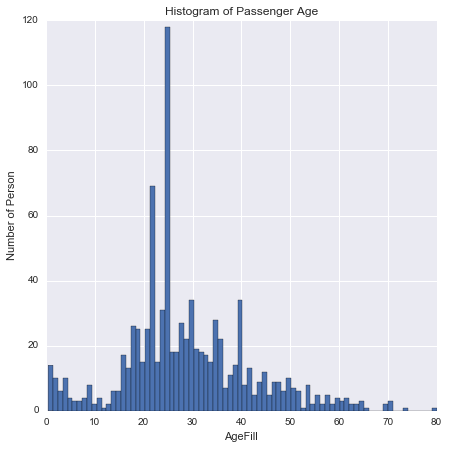

In [61]:
titanic_df.AgeFill.hist(bins=80,figsize = (7,7))
plt.xlabel("AgeFill")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

I also wanted to know if passengers traveling parents or siblings on board, increased the chances for survival.
Again, using kaggle as a guide, created a new column called Family
and first populating it with a 4 and then filling in the column with a 1 if there was a passenger with either a sibling or a parent, or 0 if the passenger was traveling alone.

In [62]:
titanic_df['Family'] = 4
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0


In [63]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,22.0,1


Here is where I started to look at the data by different attributes.

The crosstab below shows the absolute values of males and females who survived (1) and those who did not (0).

In [64]:
pd.crosstab(titanic_df["Sex"],titanic_df["Survived"],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


The crosstab below shows the percentage values of males and females who survived (1) and those who did not (0).

I found the code to present data in percentages from [www.analyticsvidhya.com](
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)


In [65]:
def percConvert(ser):
  return ser/float(ser[-1])
  
pd.crosstab(titanic_df["Sex"],titanic_df["Survived"],margins=True).apply(percConvert, axis=1)

Survived,0,1,All
Sex,,,
female,0.257962,0.742038,1.0
male,0.811092,0.188908,1.0
All,0.616162,0.383838,1.0


For the stacked barchart, I took the crosstab code and added a plot.bar function at the end of it.

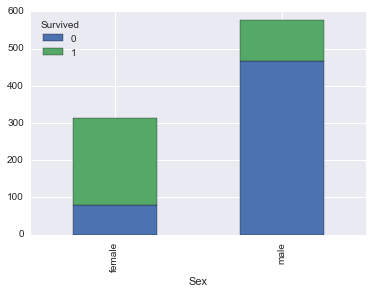

In [66]:
pd.crosstab(titanic_df["Sex"],titanic_df["Survived"],margins=False).plot.bar(stacked=True)

In [67]:
pd.crosstab(titanic_df["Family"],titanic_df["Survived"],margins=True)

Survived,0,1,All
Family,,,
0,374,163,537
1,175,179,354
All,549,342,891


In [68]:
def percConvert(ser):
  return ser/float(ser[-1])
  
pd.crosstab(titanic_df["Family"],titanic_df["Survived"],margins=True).apply(percConvert, axis=1)

Survived,0,1,All
Family,,,
0,0.696462,0.303538,1.0
1,0.494350,0.505650,1.0
All,0.616162,0.383838,1.0


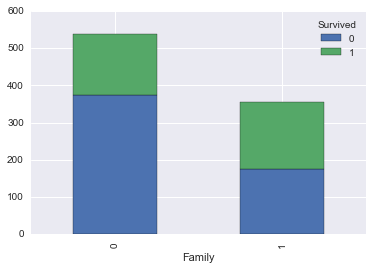

In [69]:
pd.crosstab(titanic_df["Family"],titanic_df["Survived"],margins=False).plot.bar(stacked=True)

In [70]:
pd.crosstab(titanic_df["Pclass"],titanic_df["Survived"],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [71]:
def percConvert(ser):
  return ser/float(ser[-1])
  
pd.crosstab(titanic_df["Pclass"],titanic_df["Survived"],margins=True).apply(percConvert, axis=1)

Survived,0,1,All
Pclass,,,
1,0.370370,0.629630,1.0
2,0.527174,0.472826,1.0
3,0.757637,0.242363,1.0
All,0.616162,0.383838,1.0


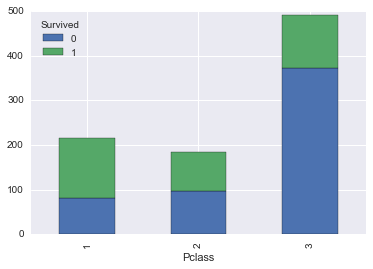

In [72]:
pd.crosstab(titanic_df["Pclass"],titanic_df["Survived"],margins=False).plot.bar(stacked=True)

In [73]:
def percConvert(ser):
  return ser/float(ser[-1])
  
pd.crosstab(titanic_df["Pclass"],titanic_df["Survived"],margins=True).apply(percConvert, axis=1)

Survived,0,1,All
Pclass,,,
1,0.370370,0.629630,1.0
2,0.527174,0.472826,1.0
3,0.757637,0.242363,1.0
All,0.616162,0.383838,1.0


I wanted to also learn how Seaborn plotted worked, so I created plots with Seaborn.

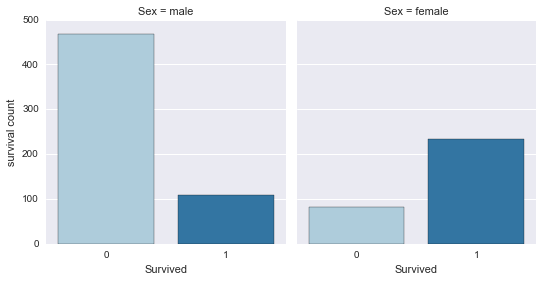

In [74]:
g = sns.factorplot(x="Survived", col="Sex", data = titanic_df, col_wrap=4,kind="count", size=4, aspect=.9,palette="Paired")
g.set_ylabels("survival count")

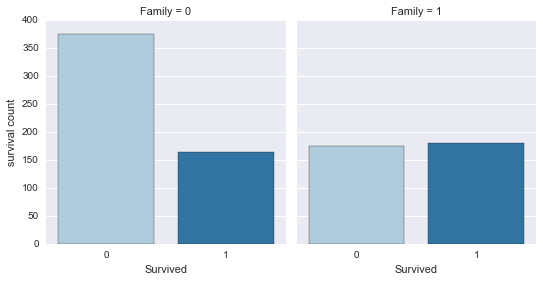

In [75]:
g = sns.factorplot(x="Survived", col="Family", data = titanic_df, col_wrap=4,kind="count", size=4, aspect=.9,palette="Paired")
g.set_ylabels("survival count")

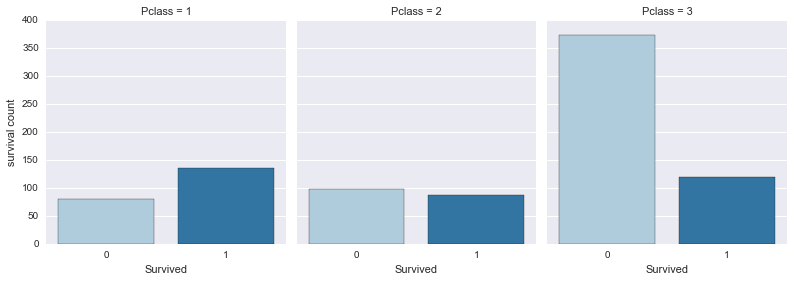

In [76]:
g = sns.factorplot(x="Survived", col="Pclass", data = titanic_df, col_wrap=4,kind="count", size=4, aspect=.9,palette="Paired")
g.set_ylabels("survival count")

The next two tables are my favorites.  I created a groupby table to learn how to code with it, however I like the ability to use multiple groupings to show the survival rates with different passenger attributes.  The table shows survival rates Sex, Passenger Class and if a passenger traveled with Family or not.  The survival rates _almost_ sort by themselves, from Females traveling in Frist class to Males traveling in Third class.

The two tables show who survived broken out by Sex, Passenger Class and if the person traveled with Family or not.  The first table shows absolute values.  The second table shows percentage values.


In [77]:
class_sex_grouping = titanic_df[ ['Family','Sex','Pclass','Survived'] ].groupby(["Sex","Pclass","Family"]).count()
class_sex_grouping

Survived
Sex    Pclass Family          
female 1      0             34
              1             60
       2      0             32
              1             44
       3      0             60
              1             84
male   1      0             75
              1             47
       2      0             72
              1             36
       3      0            264
              1             83

In [82]:
class_sex_grouping = titanic_df[ ['Family','Sex','Pclass','Survived'] ].groupby(["Sex","Pclass","Family"]).mean()
class_sex_grouping

Survived
Sex    Pclass Family          
female 1      0       0.970588
              1       0.966667
       2      0       0.906250
              1       0.931818
       3      0       0.616667
              1       0.416667
male   1      0       0.333333
              1       0.425532
       2      0       0.097222
              1       0.277778
       3      0       0.121212
              1       0.180723

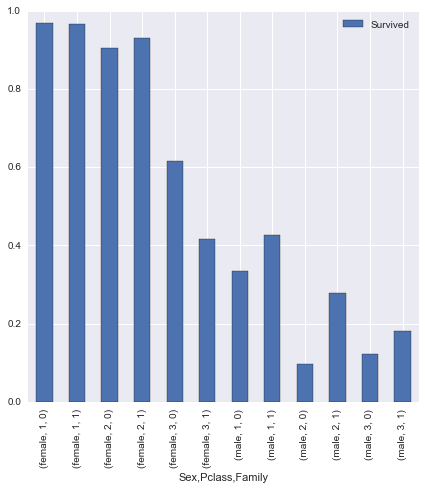

In [84]:
class_sex_grouping = titanic_df[ ['Family','Sex','Pclass','Survived'] ].groupby(["Sex","Pclass","Family"]).mean()
class_sex_grouping.plot.bar(stacked=True, figsize = (7,7))

###Conclusion
My review of the Titanic data set focused on the survival rates of three passenger attributes, Sex (male or female), passenger class (1 = first, 2 = second, 3 = third), and if the passenger had family (1) or not (0).

The Titanic carried 2,224 on its madden voyage.  The Titanic data set used in this project is a subset of the population.  The data set contains data on 891 passengers, 314 females and 577 males. Overall 38% passengers survived the sinking of the Titanic.  Broken out by Sex, 74% of female passengers survived, while 18% of male passengers survived.

63% of first class passengers survived, 47% of second class passengers survived, while 24% of third class passengers survived.  Females traveling in first or second class had survival rates above 90%.  37% of males traveling in first class survived.

38% of passengers who traveled on the Titanic traveled with family.  Of those that traveled with family, 51% survived.  Of those that did not travel with family, 30% survived.  Interestingly, males who traveled with family survived at a higher rate (and at a higher than the mean survival rate for males), than single males, across all passenger classes.  

Even though I created a new column called AgeFill to address missing Age data.  I 'played' around with the age data, but in the end, I did not use it in my tables or plots.

Further study would be needed to test how well some factors correlate with others.  For example, I noticed that the survival rates for males traveling with family were higher than single males, but was traveling with family statistically significant in terms of survival rates?  I would like to know more about statistics to figure that one out.


